<a href="https://colab.research.google.com/github/Benashael/COVID-19/blob/main/Time_Series_Visualization_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load your reduced dataset (assuming it's in a CSV file)
df = pd.read_csv('/content/reduced_dataset.csv')

# Convert 'End Date' to datetime
df['End Date'] = pd.to_datetime(df['End Date'])

**Line Plot: Trends over time**

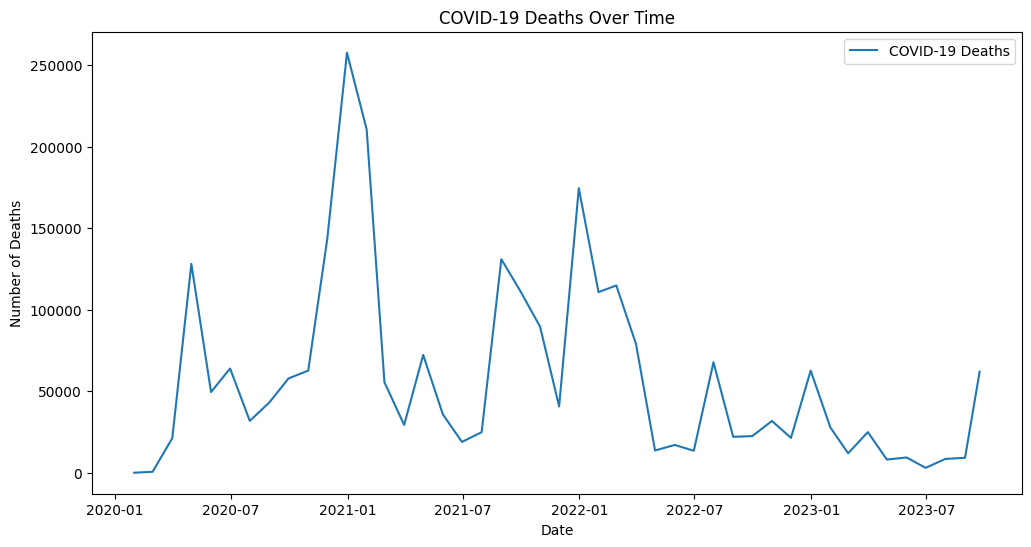

In [3]:
import matplotlib.pyplot as plt

# Aggregate the 'COVID-19 Deaths' by date
aggregated_df = df.groupby('End Date').agg({
    'COVID-19 Deaths': 'sum'
}).reset_index()

# Plotting COVID-19 Deaths over time
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['End Date'], aggregated_df['COVID-19 Deaths'], label='COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Over Time')
plt.legend()
plt.show()

**Multiple Line Plots: Comparing multiple time series**

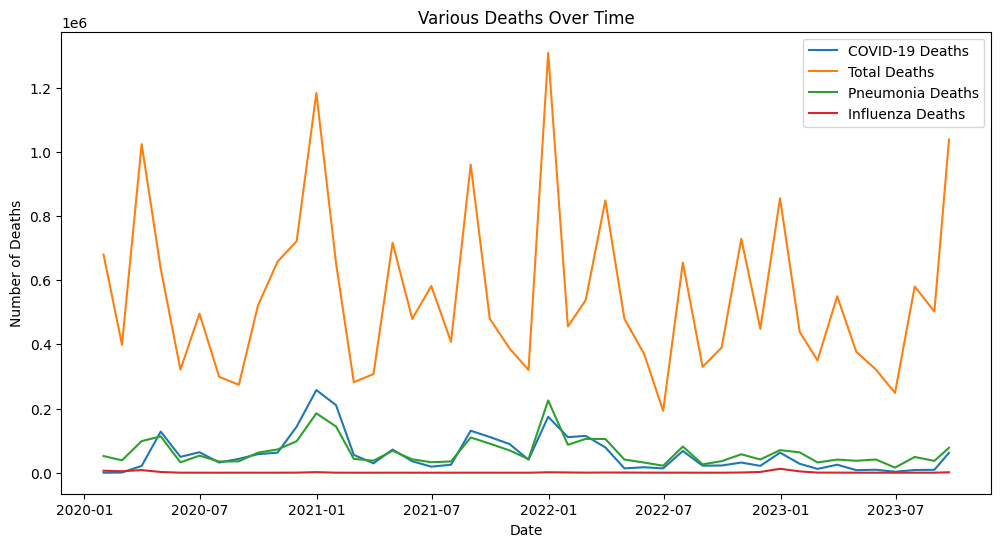

In [ ]:
# Aggregate the death-related columns by date
aggregated_df = df.groupby('End Date').agg({
    'COVID-19 Deaths': 'sum',
    'Total Deaths': 'sum',
    'Pneumonia Deaths': 'sum',
    'Influenza Deaths': 'sum'
}).reset_index()

# Plotting multiple death types over time
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['End Date'], aggregated_df['COVID-19 Deaths'], label='COVID-19 Deaths')
plt.plot(aggregated_df['End Date'], aggregated_df['Total Deaths'], label='Total Deaths')
plt.plot(aggregated_df['End Date'], aggregated_df['Pneumonia Deaths'], label='Pneumonia Deaths')
plt.plot(aggregated_df['End Date'], aggregated_df['Influenza Deaths'], label='Influenza Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Various Deaths Over Time')
plt.legend()
plt.show()

**Bar Plot: Aggregated data over time**

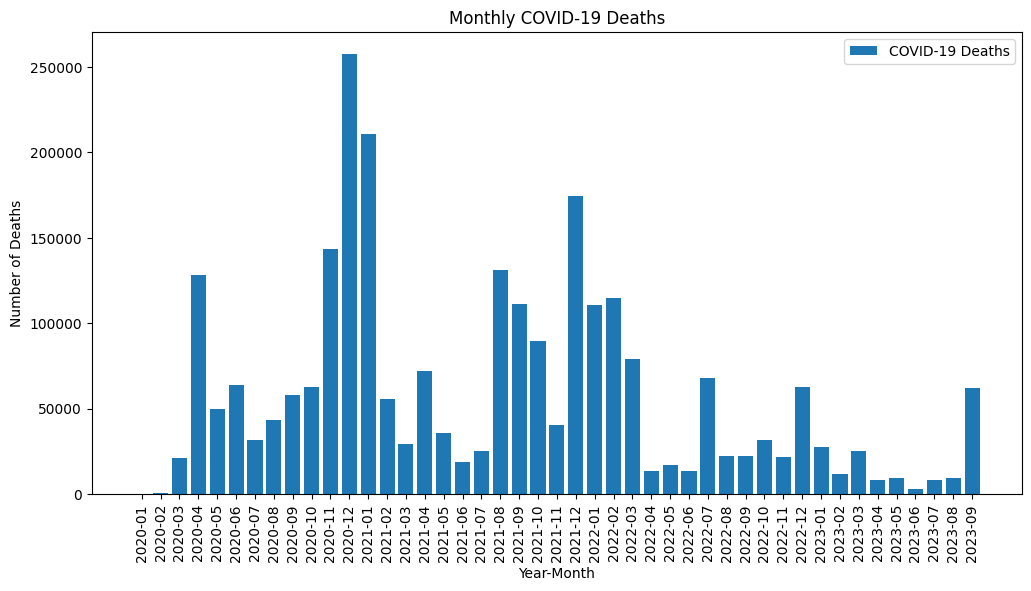

In [ ]:
# Group by year and month and sum the deaths
df['Year'] = df['End Date'].dt.year
df['Month'] = df['End Date'].dt.month

# Aggregate the data by year and month for COVID-19 Deaths
monthly_deaths = df.groupby(['Year', 'Month'])['COVID-19 Deaths'].sum().reset_index()

# Create Year-Month column using vectorized string formatting
monthly_deaths['Year-Month'] = monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str).str.zfill(2)

# Plotting bar plot for monthly COVID-19 Deaths
plt.figure(figsize=(12, 6))
plt.bar(monthly_deaths['Year-Month'], monthly_deaths['COVID-19 Deaths'], label='COVID-19 Deaths')
plt.xlabel('Year-Month')
plt.ylabel('Number of Deaths')
plt.title('Monthly COVID-19 Deaths')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Stacked Area Plot: Cumulative totals over time**

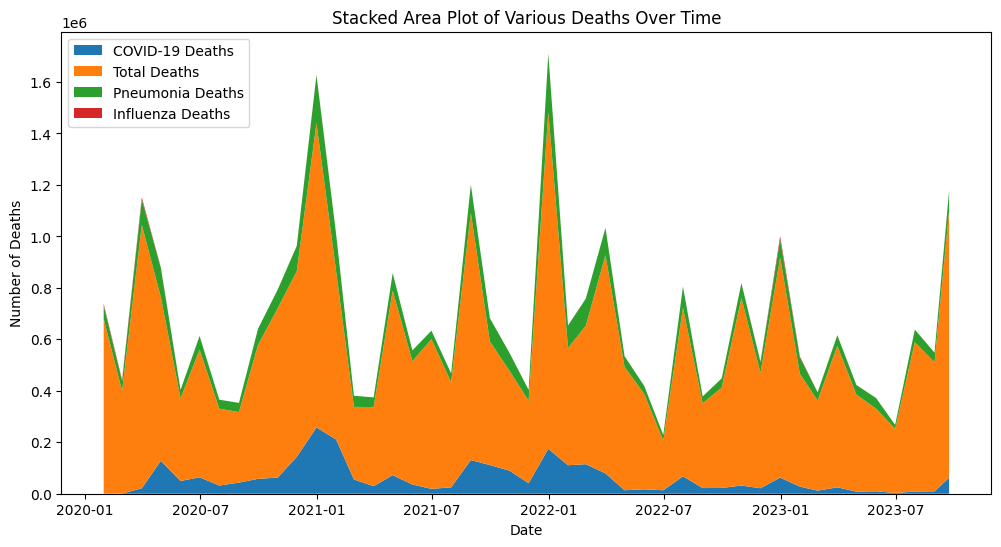

In [ ]:
# Aggregate the data by 'End Date'
aggregated_df = df.groupby('End Date').agg({
    'COVID-19 Deaths': 'sum',
    'Total Deaths': 'sum',
    'Pneumonia Deaths': 'sum',
    'Influenza Deaths': 'sum'
}).reset_index()

# Plotting stacked area plot for various deaths over time
plt.figure(figsize=(12, 6))
plt.stackplot(aggregated_df['End Date'],
              aggregated_df['COVID-19 Deaths'],
              aggregated_df['Total Deaths'],
              aggregated_df['Pneumonia Deaths'],
              aggregated_df['Influenza Deaths'],
              labels=['COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths', 'Influenza Deaths'])
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Stacked Area Plot of Various Deaths Over Time')
plt.legend(loc='upper left')
plt.show()

**Heatmap: Intensity of data points over time**

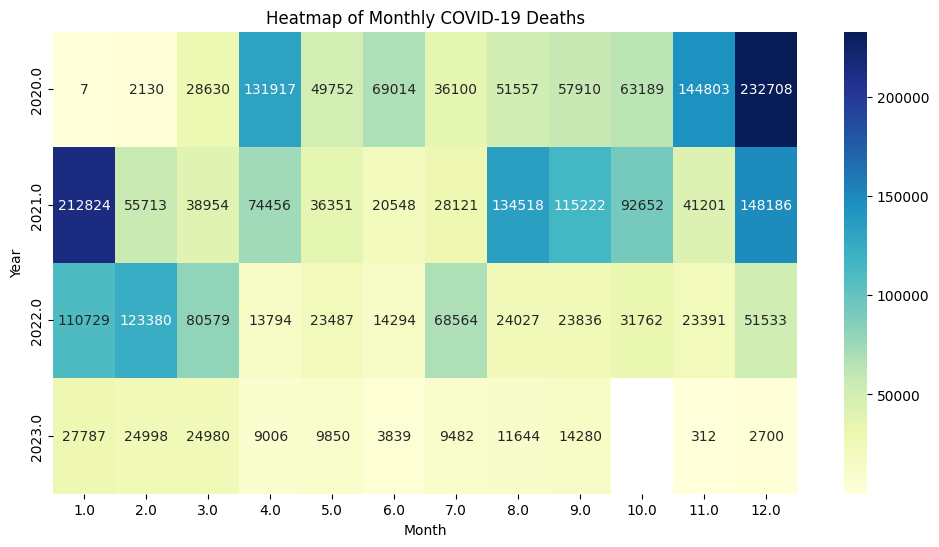

In [4]:
import seaborn as sns

# Pivot the data for heatmap
heatmap_data = df.pivot_table(index='Year', columns='Month', values='COVID-19 Deaths', aggfunc='sum')

# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Monthly COVID-19 Deaths')
plt.show()

**Box Plot: Distribution and outliers over time**

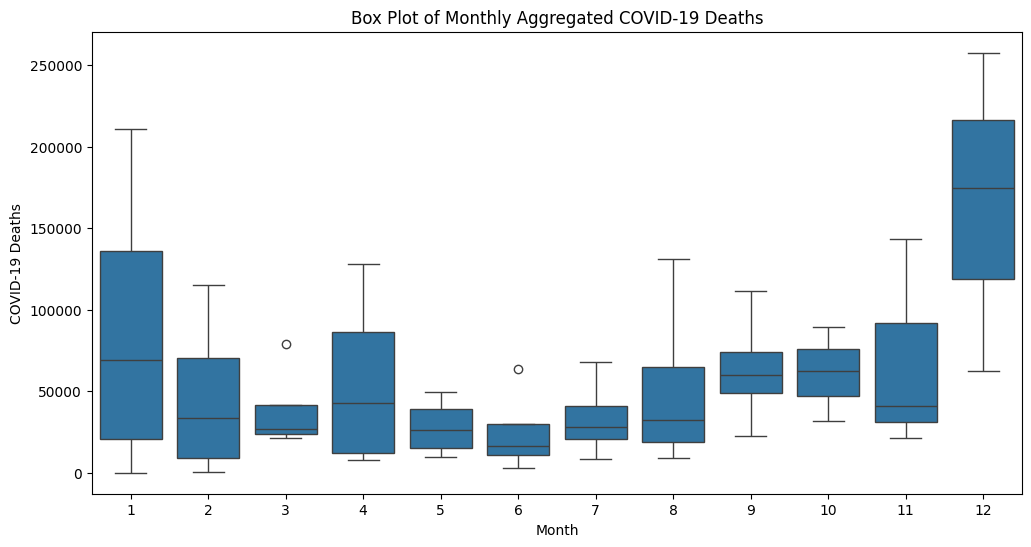

In [6]:
# Convert 'End Date' to datetime
df['End Date'] = pd.to_datetime(df['End Date'])

# Extract month and year
df['Year'] = df['End Date'].dt.year
df['Month'] = df['End Date'].dt.month

# Aggregate the data by year and month for COVID-19 Deaths
monthly_aggregated_df = df.groupby(['Year', 'Month'])['COVID-19 Deaths'].sum().reset_index()

# Prepare a column combining Year and Month for better plotting
monthly_aggregated_df['Year-Month'] = monthly_aggregated_df['Year'].astype(str) + '-' + monthly_aggregated_df['Month'].astype(str).str.zfill(2)

# Plotting box plot for aggregated COVID-19 Deaths by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='COVID-19 Deaths', data=monthly_aggregated_df)
plt.xlabel('Month')
plt.ylabel('COVID-19 Deaths')
plt.title('Box Plot of Monthly Aggregated COVID-19 Deaths')
plt.show()

**Rolling Mean and Standard Deviation Plot: Smoothing and variability**

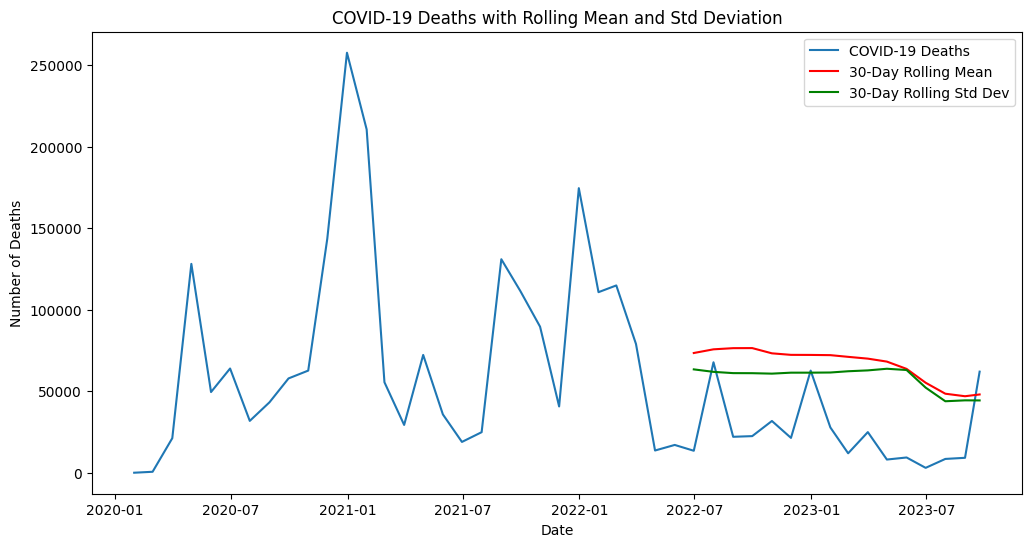

In [14]:
# Convert 'End Date' to datetime
df['End Date'] = pd.to_datetime(df['End Date'])

# Aggregate the data by 'End Date'
aggregated_df = df.groupby('End Date').agg({
    'COVID-19 Deaths': 'sum'
}).reset_index()

# Calculate rolling mean and standard deviation
aggregated_df['Rolling_Mean'] = aggregated_df['COVID-19 Deaths'].rolling(window=30).mean()
aggregated_df['Rolling_Std'] = aggregated_df['COVID-19 Deaths'].rolling(window=30).std()

# Plotting rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['End Date'], aggregated_df['COVID-19 Deaths'], label='COVID-19 Deaths')
plt.plot(aggregated_df['End Date'], aggregated_df['Rolling_Mean'], label='30-Day Rolling Mean', color='red')
plt.plot(aggregated_df['End Date'], aggregated_df['Rolling_Std'], label='30-Day Rolling Std Dev', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths with Rolling Mean and Std Deviation')
plt.legend()
plt.show()